In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./data/census.csv")

In [3]:
print(df.shape)
display(df.head())

(32561, 15)


,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
cat_cols = ['workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']
num_cols = ['age',
 'fnlgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week',]

# White space fix

In [5]:
for col in df.columns:
    if col[0] == ' ':
        df.rename(columns={col: col[1:]}, inplace=True)
for col in cat_cols:
    if col != 'education-num':
        df[col] = df[col].str[1:]
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot: >

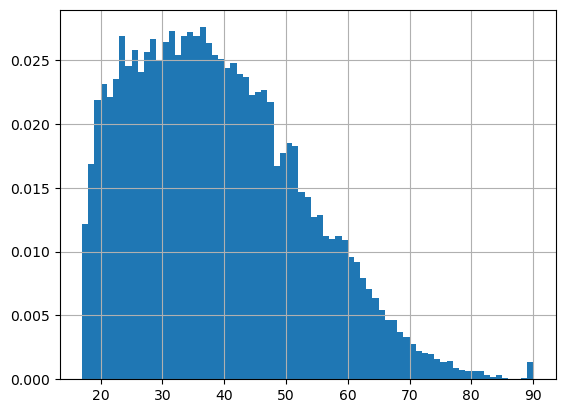

In [6]:
df.age.hist(bins=df.age.max()-df.age.min(), density=True)

In [7]:
def plot_col(frame, col_name, col_type, n_bins=None):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    if col_type == 'cat':
        _ = ax.bar(frame[col_name].unique(), frame[col_name].value_counts()[frame[col_name].unique()])
        _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)
    elif col_type == 'num':
        frame[col_name].hist(bins=100, density=True) # bins=n_bins if n_bins else frame[col_name].max()-frame[col_name].min(), 
    _ = ax.set_title(col_name)
    plt.show(fig)

# Categorical columns

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


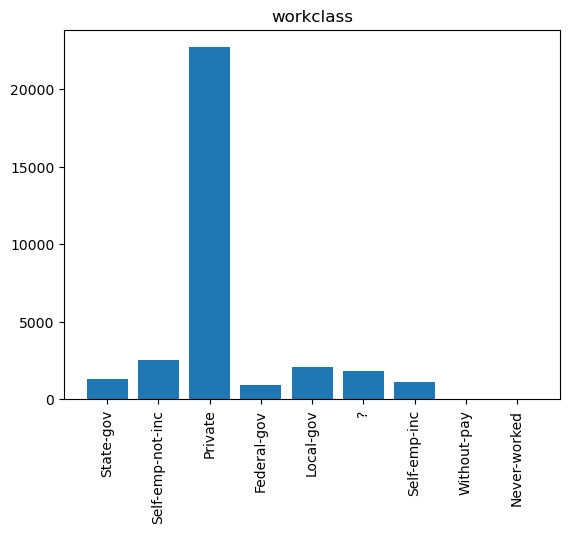

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


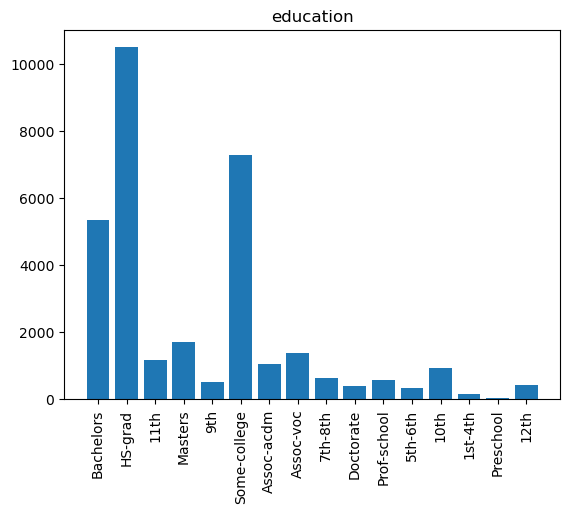

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


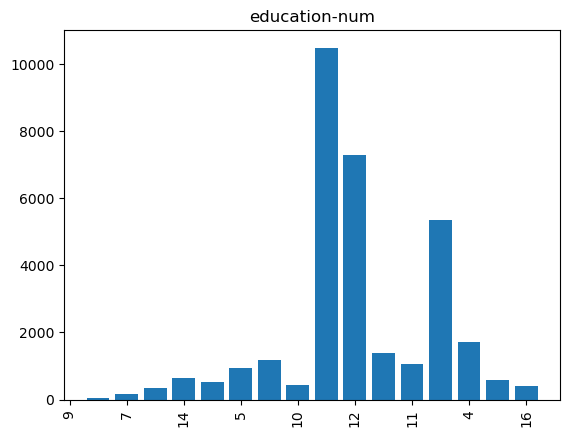

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


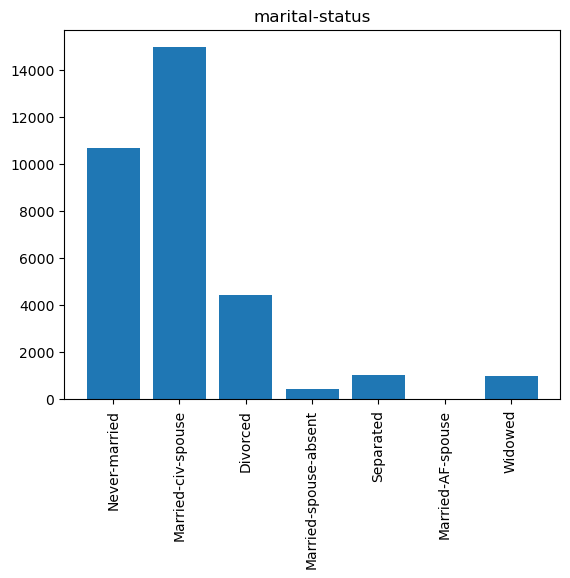

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


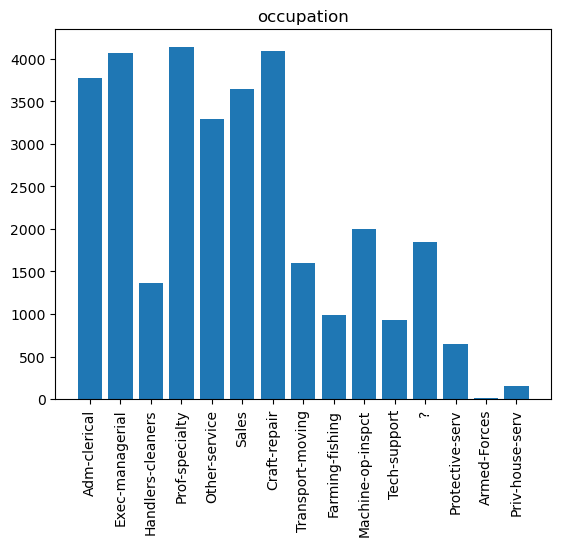

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


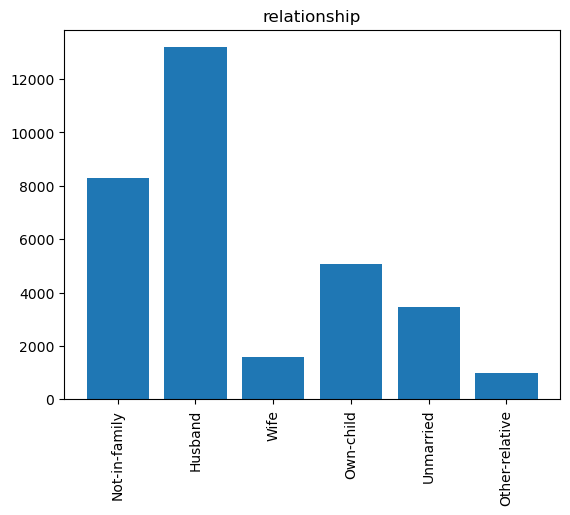

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


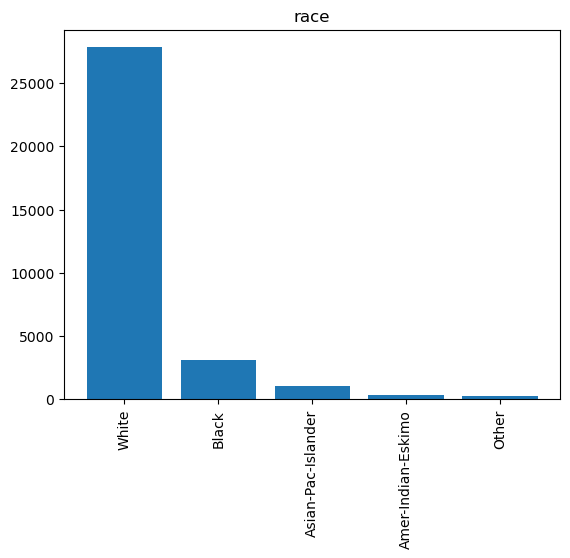

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


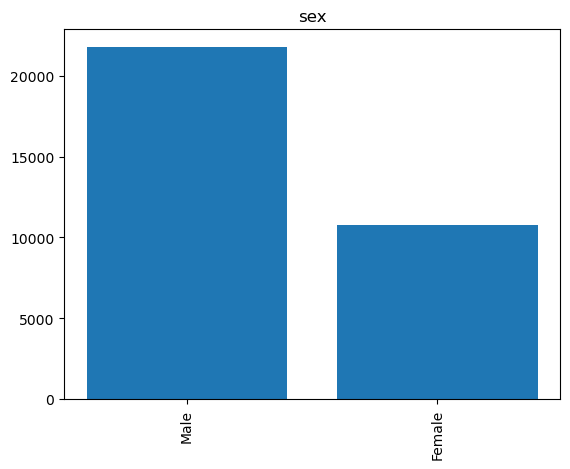

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


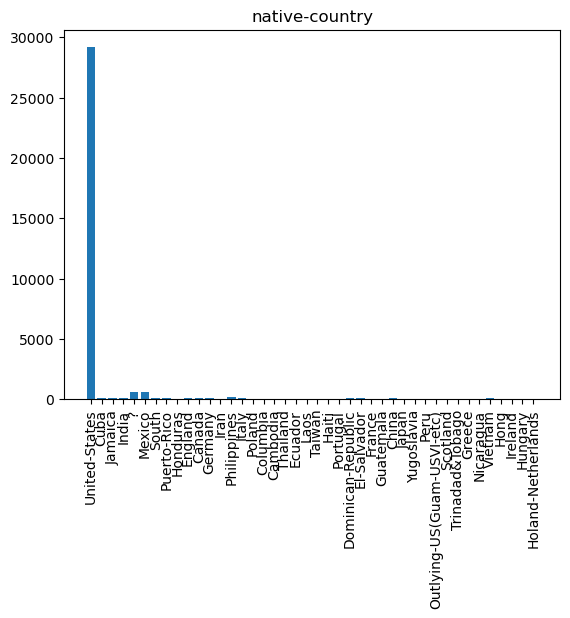

/tmp/ipykernel_27980/1520600049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(frame[col_name].unique(), rotation=90)


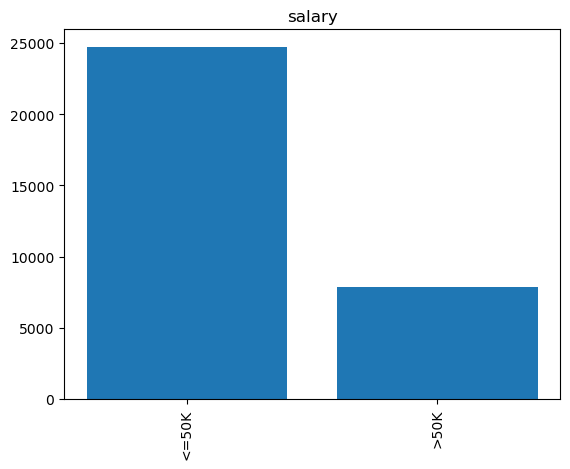

In [8]:
for col in cat_cols:
    plot_col(frame=df, col_name=col, col_type='cat')

# Numerical columns

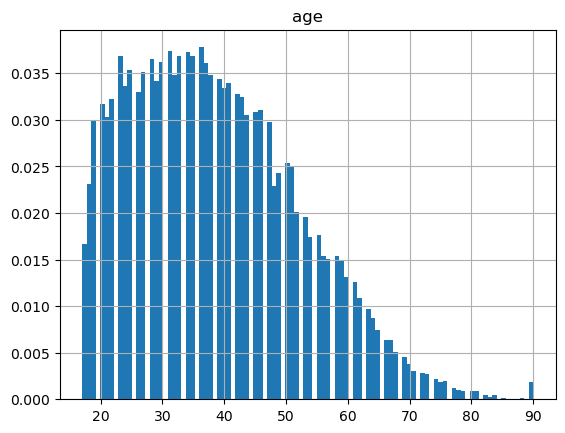

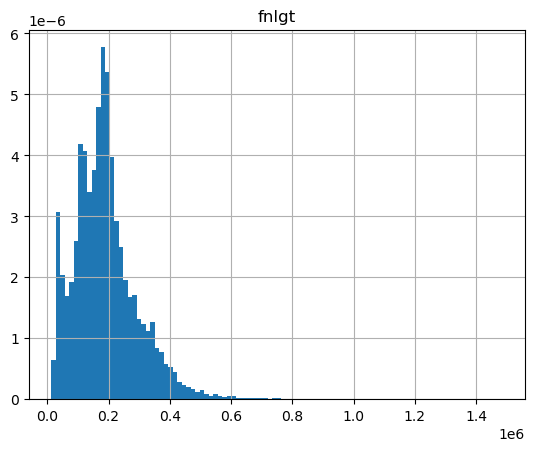

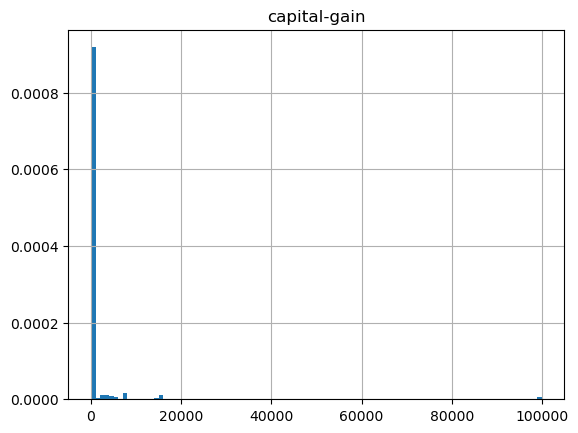

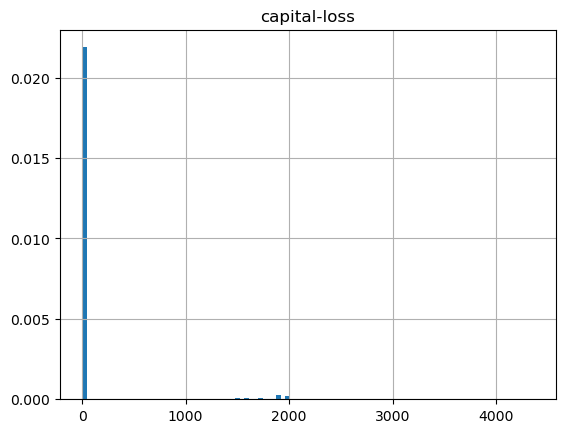

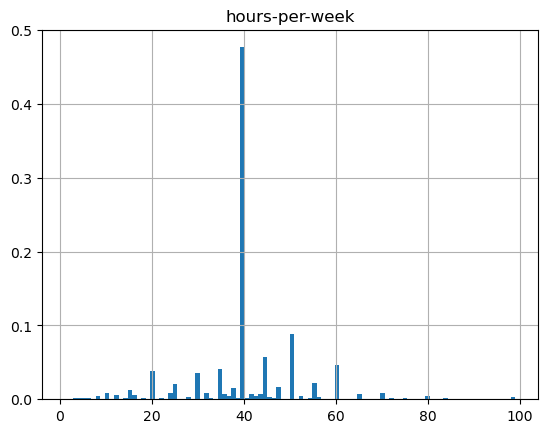

In [9]:
for col in num_cols:
    plot_col(frame=df, col_name=col, col_type='num')

# Write cleaned data (from spaces in headers) to disk

In [10]:
df.to_csv('./data/census_cleaned.csv', index=False)